### PVALS MIGHT BE OFF

In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

sns.set_theme(style = "white")

In [127]:
# MI = pd.read_csv("/Users/merieldoyle/Desktop/ckMI/data/MI_cleaned.csv", index_col = [0])
# MI = pd.DataFrame(MI) # MI.iloc[:, 126] - 126 is politics
# MI_conditions = MI.drop(MI.iloc[:, 90:125], axis = 1) # MI_conditions.iloc[:, 91] - 91 is politics, 118 columns
# MI_conditions = MI_conditions.drop(MI_conditions.iloc[:, 92:118], axis = 1)
# MI_cond_pol = MI_conditions.drop(['ETHNI6'], axis = 1)
# MI_cond_pol

,pedophile_mental,pedophile_change,pedophile_want_c,pedophile_genes,pedophile_punish,pedophile_control,pedophile_wrong,pedophile_distress,pedophile_common,drugs_mental,...,schizo_mental,schizo_change,schizo_want_c,schizo_genes,schizo_punish,schizo_control,schizo_wrong,schizo_distress,schizo_common,politics
1,3.0,4.0,3.0,5.0,5.0,4.0,4.0,4.0,8.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,6.0,1.0,4.0,4.0,5.0,5.0,5.0,14.0,5
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,5.0,6.0,5.0,5.0,5.0,6.0,5.0,52.0,1
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,5.0,5.0,2.0,2.0,6.0,3.0,7.0,2.0,7.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,6.0,6.0,6.0,5.0,5.0,6.0,4.0,77.0,1
1220,1.0,4.0,1.0,1.0,7.0,7.0,7.0,1.0,45.0,3.0,...,7.0,7.0,5.0,4.0,4.0,1.0,1.0,5.0,40.0,7
1221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


### CONDITION MATRICES

In [128]:
politics = MI_cond_pol.iloc[:, 90]

MI_ped = MI_cond_pol.iloc[:, 0:9]
MI_ped["politics"] = politics

MI_drugs = MI_cond_pol.iloc[:, 9:18]
MI_drugs["politics"] = politics

MI_psycho = MI_cond_pol.iloc[:, 18:27]
MI_psycho["politics"] = politics

MI_gay = MI_cond_pol.iloc[:, 27:36]
MI_gay["politics"] = politics

MI_fetish = MI_cond_pol.iloc[:, 36:45]
MI_fetish["politics"] = politics

MI_racist = MI_cond_pol.iloc[:, 45:54]
MI_racist["politics"] = politics

MI_trans = MI_cond_pol.iloc[:, 54:63]
MI_trans["politics"] = politics

MI_obese = MI_cond_pol.iloc[:, 63:72]
MI_obese["politics"] = politics

MI_dep = MI_cond_pol.iloc[:, 72:81]
MI_dep["politics"] = politics

MI_schizo = MI_cond_pol.iloc[:, 81:91]
MI_schizo["politics"] = politics

Colored boxes indicate significance at p = .05, shade of color indicates magnitude and direction of correlation (see legend on the right of the graph). The "politics" variable should really have been called "political conservatism" - higher numbers indicate more conservatism, lower numbers indicate more liberalism.   

In [44]:
# pval_matrix = MI_cond_pol.corr(method = pearsonr_pval)
# pval_matrix

In [129]:
# function to plot corr matrix with correct masks

def plot_cor_matrix(MI_cond, str):
    corr = MI_cond.corr() # correlation matrix
    pval = MI_cond.corr(method = pearsonr_pval) # corresponding pval
    pval[pval == 1] = np.nan # change 1's to NaN
    fig, ax = plt.subplots(figsize = (6, 4.285))
    plt.text(6, 3, str, fontsize = 15) # title
    mask = np.invert(np.tril(pval > 0.05)) # mask opposite of insig pval
    cmap = sns.diverging_palette(0, 0, n = 1, l = 100, as_cmap = False) # generate colormap
    sns.heatmap(corr,
                mask = mask,
                cmap = cmap,
                annot = True, 
                annot_kws = {"size": 6.5}, # size of insig pval
                square = True,
                cbar = False)
    mask = np.invert(np.tril(pval < 0.05)) # mask opposite of sig pval
    cmap = sns.diverging_palette(20, 230, as_cmap = True)
    xticklabels = ["mental", "change", "want change", "genes", "punish", 
                   "control", "wrong", "distress", "common", "politics"]
    yticklabels = xticklabels
    sns.heatmap(corr, 
                mask = mask,
                cmap = cmap,
                vmin = -1,
                vmax = 1,
                annot = True,
                annot_kws = {"size": 8, "weight": "bold"}, # size of sig pval
                xticklabels = xticklabels,
                yticklabels = yticklabels,
                center = 0,
                square = True,
                cbar = False)
    ax.tick_params(labelsize = 10) # tick size
    plt.xticks(rotation = 40, ha = 'right') # rotate xticks
    cmap = sns.diverging_palette(20, 230, as_cmap = True)
    norm = Normalize(vmin = -1, vmax = 1)
    sm = plt.cm.ScalarMappable(cmap = cmap, norm = norm)
    cax = fig.add_axes([0.77, 0.1, 0.025, 0.7]) # [horiz axis, vert axis, width, height]
    cbar = plt.colorbar(sm, 
                        shrink = 0.8, 
                        aspect = 30, 
                        pad = 0,
                        cax = cax)
    cbar.ax.tick_params(size = 0, 
                        labelsize = 7)
    cbar.outline.set_visible(False)
    
    # plt.savefig(f"{str}.png", dpi = 300, bbox_inches="tight")
    
    plt.show()
    
    # print(pval)

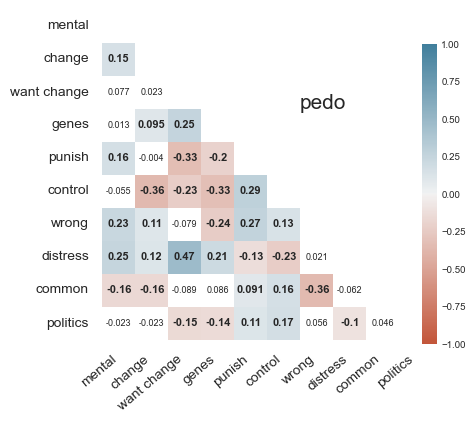

In [130]:
plot_cor_matrix(MI_ped, "pedo")
# plot_cor_matrix(MI_drugs, "drugs")
# plot_cor_matrix(MI_psycho, "psycho")
# plot_cor_matrix(MI_gay, "gay") # v sig
# plot_cor_matrix(MI_fetish, "fetish") # v sig
# plot_cor_matrix(MI_racist, "racist") # v sig
# plot_cor_matrix(MI_trans, "trans") # v sig
# plot_cor_matrix(MI_obese, "obese")
# plot_cor_matrix(MI_dep, "dep")
# plot_cor_matrix(MI_schizo, "schizo") # v sig

### ALL CONDITIONS MATRIX

In [155]:
empty_0 = pd.DataFrame()
for i in np.arange(0, 10): 
    MI_mental = (MI_cond_pol.iloc[:, 9*i]) # mental
    empty_0 = pd.concat([empty_0, MI_mental], axis = 0)
empty_1 = pd.DataFrame()
for i in np.arange(0, 10): 
    MI_change = MI_cond_pol.iloc[:, 9*i + 1] # change
    empty_1 = pd.concat([empty_1, MI_change], axis = 0)
empty_2 = pd.DataFrame()
for i in np.arange(0, 10): 
    MI_wantchange = MI_cond_pol.iloc[:, 9*i + 2] # want change
    empty_2 = pd.concat([empty_2, MI_wantchange], axis = 0)
empty_3 = pd.DataFrame()
for i in np.arange(0, 10):     
    MI_genes = MI_cond_pol.iloc[:, 9*i + 3] # genes
    empty_3 = pd.concat([empty_3, MI_genes], axis = 0)
empty_4 = pd.DataFrame()
for i in np.arange(0, 10): 
    MI_punish = MI_cond_pol.iloc[:, 9*i + 4] # punish
    empty_4 = pd.concat([empty_4, MI_punish], axis = 0)
empty_5 = pd.DataFrame()
for i in np.arange(0, 10): 
    MI_control = MI_cond_pol.iloc[:, 9*i + 5] # control
    empty_5 = pd.concat([empty_5, MI_control], axis = 0)
empty_6 = pd.DataFrame()
for i in np.arange(0, 10): 
    MI_wrong = MI_cond_pol.iloc[:, 9*i + 6] # wrong
    empty_6 = pd.concat([empty_6, MI_wrong], axis = 0)
empty_7 = pd.DataFrame()
for i in np.arange(0, 10): 
    MI_distress = MI_cond_pol.iloc[:, 9*i + 7] # distress
    empty_7 = pd.concat([empty_7, MI_distress], axis = 0)
empty_8 = pd.DataFrame()
for i in np.arange(0, 10): 
    MI_common = MI_cond_pol.iloc[:, 9*i + 8] # common
    empty_8 = pd.concat([empty_8, MI_common], axis = 0)
empty_9 = pd.DataFrame()
MI_politics = MI_cond_pol.iloc[:, 90] # politics
empty_9 = pd.concat([empty_9, MI_politics], axis = 0)

In [168]:
lst = [empty_0, empty_1, empty_2, empty_3, empty_4, empty_5, empty_6, empty_7, empty_8, empty_9]
MI_perc = pd.concat(lst, axis = 1)
MI_perc.columns = ["mental", "change", "want change", "genes", "punish", "control", "wrong", "distress", "common", "politics"]
    
MI_perc

,mental,change,want change,genes,punish,control,wrong,distress,common,politics
1,3.0,4.0,3.0,5.0,5.0,4.0,4.0,4.0,8.0,3.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...
1218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
1219,4.0,6.0,6.0,6.0,5.0,5.0,6.0,4.0,77.0,1.0
1220,7.0,7.0,5.0,4.0,4.0,1.0,1.0,5.0,40.0,7.0
1221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [170]:
per_corr = MI_perc.corr()
per_pval = MI_perc.corr(method = pearsonr_pval)

In [179]:
# function to plot corr matrix with correct masks

def plot_cor_matrix(perc, str):
    corr = perc.corr() # correlation matrix
    pval = perc.corr(method = pearsonr_pval) # corresponding pval
    pval[pval == 1] = np.nan # change 1's to NaN for mask
    fig, ax = plt.subplots(figsize = (6, 4.285))
    plt.title(str, loc = "center")
    mask = np.invert(pval < 0.05) # mask opposite of insig pval
    cmap = sns.diverging_palette(20, 230, as_cmap = True) # generate colormap
    sns.heatmap(corr,
                mask = mask,
                cmap = cmap,
                vmin = -1, # vmin = np.nanmin(corr.iloc[:, :].values)
                vmax = 1, # vmax = np.nanmax(corr.iloc[:, :].values)
                annot = True, 
                annot_kws = {"size": 8, "weight":"bold"}, # size of insig pval
                square = True,
                cbar = False)
    ax.tick_params(labelsize = 10) # tick size
    plt.xticks(rotation = 40, ha = 'right') # rotate xticks
    cmap = sns.diverging_palette(20, 230, as_cmap = True)
    norm = Normalize(vmin = -1, vmax = 1)
    sm = plt.cm.ScalarMappable(cmap = cmap, norm = norm)
    cax = fig.add_axes([0.83, 0.1, 0.025, 0.7]) # [horiz axis, vert axis, width, height]
    cbar = plt.colorbar(sm, 
                        shrink = 0.8, 
                        aspect = 30, 
                        pad = 0,
                        cax = cax)
    cbar.ax.tick_params(size = 0, 
                        labelsize = 7)
    cbar.outline.set_visible(False)
    
    # plt.savefig("all_conditions.png", dpi = 300, bbox_inches="tight")
    
    plt.show()

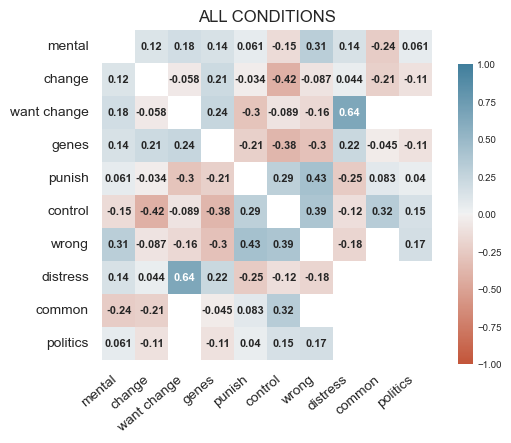

In [180]:
# ALL
plot_cor_matrix(MI_perc, "ALL CONDITIONS")